# 네이버 기사 크롤링

In [3]:
import scrapy
from scrapy.http import TextResponse
from selenium import webdriver

### 1. 프로젝트 생성

In [3]:
!scrapy startproject newsNaver

New Scrapy project 'newsNaver', using template directory 'c:\users\gk\anaconda3\lib\site-packages\scrapy\templates\project', created in:
    C:\Users\Gk\Documents\dev\Crawling\newsNaver\newsNaver

You can start your first spider with:
    cd newsNaver
    scrapy genspider example example.com


### 2. items.py 코드 작성

In [5]:
%%writefile newsNaver/newsNaver/items.py

import scrapy

class NewsnaverItem(scrapy.Item):
    title = scrapy.Field()
    content = scrapy.Field()
    category = scrapy.Field()
    summary = scrapy.Field()
    link = scrapy.Field()

Overwriting newsNaver/newsNaver/items.py


### 3. xpath 확인

In [52]:
# 링크
url = "https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100"
driver = webdriver.Chrome(r'C:\Users\Gk\Documents\dev\etc\chromedriver.exe')
driver.get(url)

In [53]:
elements = driver.find_elements_by_xpath('//*[@id="section_body"]/ul/li/dl/dt[2]/a')
links = [element.get_attribute("href") for element in elements]
links[-2:]

['https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=003&aid=0009962997',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=081&aid=0003106738']

In [25]:
# 상세페이지 : sc
url = links[0]
req = requests.get(url)
response = TextResponse(req.url, body=req.text, encoding="utf-8")
response

<200 https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=001&aid=0011727655>

In [26]:
title = response.xpath('//*[@id="articleTitle"]/text()')[0].extract()
category = response.xpath('//*[@id="lnb"]/ul/li[@class="on"]/a/@href')[0].extract().split("=")[-1]
content = response.xpath('//*[@id="articleBodyContents"]/text()').extract()
content = "".join(content).strip()
summary = response.xpath('//*[@id="articleBodyContents"]/strong/text()').extract()
summary = ". ".join(summary)
title, category, summary, content

('공군 최초 여군 원사 탄생…17전투비행단 정정숙 원사',
 '100',
 '',
 '(충주=연합뉴스) 박종국 기자 = 공군 최초의 여군 원사가 탄생했다.6일 공군 19전투비행단에 따르면 이 부대 소속 정정숙(45) 원사가 지난 1일 자로 진급했다.    1995년 4월 육군 여자 부사관 후보생 137기로 임관한 정 원사는 2000년 3월 공군으로 전군, 공군 교육사 훈련단 간부교육대대 훈육관 등으로 복무했다.    2003년 19전투비행단으로 옮겨 화생방지원대 탐측반과 방호반 소속으로 근무했다.    정 원사는 지난해 1월부터 이 부대 화생방 지원대 주임 원사와 탐측반장을 겸임해왔다.업무 처리 능력과 친화력을 인정받아 2008년 19전투비행단장 공로 표창을 받은 정 원사는 임관 25년 만에 원사로 진급하며 공군 최초 여군 원사 타이틀을 얻었다.    정 원사는 "부사관으로는 가장 높은 계급에 오른 데다 여군 최초라는 타이틀까지 얻게 돼 무거운 책임감을 느낀다"며 "전문성을 갖춘 선배로서 후배들을 이끌고 지휘관과 병사 간 가교역할을 충실히 수행하겠다"고 말했다.    pjk@yna.co.kr')

### 4. spider 코드 작성

In [ ]:
//*[@id="section_body"]/ul/li/dl/dt[2]/a
//*[@id="section_body"]/ul[1]/li[1]/dl/dt[2]/a
//*[@id="section_body"]/ul[2]/li[2]/dl/dt[2]/a
//*[@id="section_body"]/ul[3]/li[5]/dl/dt[2]/a
//*[@id="section_body"]/ul[4]/li[5]/dl/dt[2]/a

//*[@id="section_body"]/ul[1]/li[1]/dl/dt[1]/a
//*[@id="section_body"]/ul[3]/li[5]/dl/dt[1]/a
//*[@id="section_body"]/ul[4]/li[5]/dl/dt[1]/a

//*[@id="section_body"]/ul/li/dl/dt[1]

In [62]:
from bs4 import BeautifulSoup
# code = 100
# url = "https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1={}".format(code)
url = "https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100"
req = requests.get(url)
response = TextResponse(req.url, body=req.text, encoding="utf-8")
# links = response.xpath('//*[@id="section_body"]/ul/li/dl/dt[2]/a/@href').extract()
links = response.xpath('//*[@id="section_body"]/ul')
links

[]

In [ ]:
//*[@id="section_body"]/ul/li/dl/dt[2]/a
//*[@id="section_body"]/ul/li/dl/dt[2]/a
//*[@id="section_body"]/ul/li[4]/dl/dt[2]/a
//*[@id="section_body"]/ul/li[5]/dl/dt[2]/a

In [1]:
%%writefile newsNaver/newsNaver/spiders/spider.py
import scrapy
from newsNaver.items import NewsnaverItem
from selenium import webdriver

class NaverSpider(scrapy.Spider):
    name = "NewsNaver"
    allow_domain = ["https://news.naver.com"]
    start_urls = ["https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100"]
    
    def parse(self, response):
        options = webdriver.ChromeOptions()
        options.add_argument("headless")
        driver = webdriver.Chrome('/usr/local/bin/chromedriver', options=options)
        for code in range(100, 106):
            url = "https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1={}".format(code)
            driver.get(url)
            elements = driver.find_elements_by_xpath('//*[@id="section_body"]/ul/li/dl/dt[2]/a')
            links = [element.get_attribute("href") for element in elements]
            for link in links:
                yield scrapy.Request(link, callback=self.parse_content)
        driver.quit()
            
    def parse_content(self, response):
        item = NewsnaverItem()
        item['title'] = response.xpath('//*[@id="articleTitle"]/text()')[0].extract()
        item['category'] = response.xpath('//*[@id="lnb"]/ul/li[@class="on"]/a/@href')[0].extract().split("=")[-1]
        content = response.xpath('//*[@id="articleBodyContents"]/text()').extract()
        item['content'] = "".join(content).strip()
        summary = response.xpath('//*[@id="articleBodyContents"]/strong/text()').extract()
        item['summary'] = ". ".join(summary)
        item['link'] = response.url
        yield item

Overwriting newsNaver/newsNaver/spiders/spider.py


### 5. settings.py : robost_obey = False 수정

In [7]:
!sed -i 's/ROBOTSTXT_OBEY = True/ROBOTSTXT_OBEY = False/' newsNaver/newsNaver/settings.py

### 6. run.sh 만들기

In [8]:
%%writefile run.sh
cd newsNaver
scrapy crawl NewsNaver -o naver_article.csv

Writing run.sh


In [7]:
!run.sh

### 7. 크롤링 확인

In [8]:
df_n = pd.read_csv('newsNaver/naver_article.csv')
df_n[['category', 'title', 'summary', 'content', 'link']].head()

,category,title,summary,content,link
0,100,명단 공개 안 한 이유 있었네…與 4명 중 1명 다주택자,양향자⋅윤준병⋅김희재 호남 초선 3인방. 지역구에 집없는 서울 수도권 다주택자,더불어민주당(옛 더불어시민당 포함) 소속 21대 국회의원 180명 가운데 서울 수도...,https://news.naver.com/main/read.nhn?mode=LSD&...
1,100,"안희정 조화 비판에 노회찬 소환한 친문…""정의당, 이건 아니다""",NaN,[머니투데이 구단비 기자] 정의당이 문재인 대통령이 안희정 전 충남도지사 모친상 빈...,https://news.naver.com/main/read.nhn?mode=LSD&...
2,101,"불만 터트린 제주항공 ""셧다운은 양사 합의-구조조정은 이스타측 안""","""왜곡발표로 제주항공 명예실추"" 강한 유감 표명. ""인수 선행조건 모두 완료...이...","[파이낸셜뉴스] [파이낸셜뉴스] 제주항공이 ""이스타항공 셧다운은 양사간 합의에 이뤄...",https://news.naver.com/main/read.nhn?mode=LSD&...
3,100,"[종합]""성폭력 가해자에 조화?"" 文대통령, 안희정 모친상 조화 논란…정치권 비판 잇따라","'업무상 위력에 의한 성폭력 혐의' 안희정, 지난 4일 모친상. 대통령·민주당, 안...",[아시아경제 김가연 기자] 문재인 대통령이 안희정 전 충남지사의 모친상 빈소에 조화...,https://news.naver.com/main/read.nhn?mode=LSD&...
4,100,"윤미향 ""저는 참 겁쟁이…버티지 않고 수용할 것"" 심경 전해",NaN,"윤미향 더불어민주당 의원은 7일 ""사실은 저는 참 겁쟁이""라며 ""지난 30여 년 동...",https://news.naver.com/main/read.nhn?mode=LSD&...


### 8. WordCloud 출력

In [3]:
# df_sum = df_n['summary']
df_sum = df_n['content']
df_sum

0      더불어민주당(옛 더불어시민당 포함) 소속 21대 국회의원 180명 가운데 서울 수도...
1      [머니투데이 구단비 기자] 정의당이 문재인 대통령이 안희정 전 충남도지사 모친상 빈...
2      [파이낸셜뉴스] [파이낸셜뉴스] 제주항공이 "이스타항공 셧다운은 양사간 합의에 이뤄...
3      [아시아경제 김가연 기자] 문재인 대통령이 안희정 전 충남지사의 모친상 빈소에 조화...
4      윤미향 더불어민주당 의원은 7일 "사실은 저는 참 겁쟁이"라며 "지난 30여 년 동...
                             ...                        
234    신라젠행동주의주주모임은 10일 서울 여의도 한국거래소 앞에서 신라젠 주식 거래 재개...
235    (서울=연합뉴스) 곽민서 기자 = 코스닥 바이오 기업 신라젠의 상장폐지 여부가 내달...
236    [서울경제] 10일 오후 고( 故) 박원순 서울시장의 빈소가 차려진 서울대병원 장례...
237    미래통합당은 10일 박지원 국정원장 후보자의 군 복무 중 대학 재학 논란과 관련 "...
238    미래통합당 주호영 원내대표가 10일 "김현미 국토교통부부 장관을 두고 집값을 안정시...
Name: content, Length: 239, dtype: object

In [4]:
df_sum = df_sum.dropna()
df_sum

0      더불어민주당(옛 더불어시민당 포함) 소속 21대 국회의원 180명 가운데 서울 수도...
1      [머니투데이 구단비 기자] 정의당이 문재인 대통령이 안희정 전 충남도지사 모친상 빈...
2      [파이낸셜뉴스] [파이낸셜뉴스] 제주항공이 "이스타항공 셧다운은 양사간 합의에 이뤄...
3      [아시아경제 김가연 기자] 문재인 대통령이 안희정 전 충남지사의 모친상 빈소에 조화...
4      윤미향 더불어민주당 의원은 7일 "사실은 저는 참 겁쟁이"라며 "지난 30여 년 동...
                             ...                        
234    신라젠행동주의주주모임은 10일 서울 여의도 한국거래소 앞에서 신라젠 주식 거래 재개...
235    (서울=연합뉴스) 곽민서 기자 = 코스닥 바이오 기업 신라젠의 상장폐지 여부가 내달...
236    [서울경제] 10일 오후 고( 故) 박원순 서울시장의 빈소가 차려진 서울대병원 장례...
237    미래통합당은 10일 박지원 국정원장 후보자의 군 복무 중 대학 재학 논란과 관련 "...
238    미래통합당 주호영 원내대표가 10일 "김현미 국토교통부부 장관을 두고 집값을 안정시...
Name: content, Length: 239, dtype: object

In [6]:
from konlpy.tag import Okt

In [7]:
tagger = Okt()

def tokenize(doc):
    tokens = [t for t in tagger.morphs(doc)]
    return tokens

In [8]:
docs = [x for x in df_sum.to_numpy()]
docs = tuple(docs)
docs[0]

'“휘어지면서 바람을 이겨내는 대나무보다는 바람에 부서지는 참나무로 살겠다.”     추미애 법무부 장관이 페이스북 자기 소개란에 적어 놓은 문구다. 강직함을 표상으로 삼고 싶어서였던지 추 장관은 1995년 김대중 전 대통령 권유로 정계에 입문한 이후 25년간 줄곧 강골 여성 정치인의 길을 걸어왔다. 정치적 갈등 국면에선 우회로가 아닌 전투를 택했고, 옳다고 믿는 일을 추진하는 데 거리낌이 없었다. 그에게 ‘추다르크’라는 별명이 생긴 이유다. 추 장관의 한 측근은 “여성 정치인 중 드물게 전투에 최적화된 스타일”이라며 “특히 자신의 권위나 권한이 위협받는 상황에서 예민하게 반응한다”고 말했다.        추 장관의 이같은 면모는 최근 윤석열 검찰총장과의 갈등 국면에서 더욱 두드러진다. 지난 1월 취임 이후 6개월째 윤 총장과 기싸움을 벌여온 추 장관의 태도는 줄곧 강경 일변도였다. 취임 직후 사실상 ‘윤석열 사단’ 좌천성 인사를 단행해 그의 손발을 잘라냈다는 평가를 받았고, 비판 발언의 수위도 점차 높아져 왔다. 지난달 25일엔 “이런 말 안 듣는 총장과 일해 본 장관이 없다”며 불편한 감정을 노골적으로 드러냈다.             추 장관과 윤 총장 간 갈등은 민주당이 추구하는 ‘검찰 개혁’ 이슈와 맞물려 여의도 정치권으로 옮겨붙은 뒤 확전 양상이다. “조직을 위해 (윤 총장이) 결단해야 한다”(국회 법사위원장인 윤호중 민주당 의원)는 여당은 직간접적으로 윤 총장의 사퇴를 압박하고, 야당은 ‘추미애 장관 탄핵’을 언급하며 맞불을 놓고 있다. 여야가 각각 추 장관과 윤 총장을 대리해 공방을 벌이고 있는 형국이다.           그런데 최근 민주당 내에서 다소 이상기류가 감지되고 있다. 추 장관의 공세적 행보를 향한 우려의 목소리가 일부 흘러나오기 시작했다. 특히 추 장관이 지난 3일 윤 총장에 대해 이른바 ‘검·언 유착 의혹 사건’에서 손을 떼라고 지휘권을 발동한 이후 민주당 내에선 자중론을 이야기하는 목소리가 조금씩 커지고 있다.           

tokens = tokenize(docs[0])
tokens = [token for token in tokens if token.isalnum()]
tokens[:10]

In [9]:
from tqdm import tqdm

sentences = []
for d in tqdm(docs):
    tokens = [token for token in tokenize(d) if token.isalnum()]
    sentences.append(tokens)

100%|██████████| 358/358 [00:40<00:00,  8.85it/s]


In [10]:
words = [word for sentence in sentences for word in sentence]
type(words)

list

In [11]:
len(words)

204382

In [12]:
words_remove = ['도', '으로', '에', '과', '이', '등', '의', '은', 
                '에서', '할', '와', '수', '차', '적', '명', '가',
                '것', '한', '지', '서', '건', '양', '위', '로', 
                '에도', '주', '는', '를', '을', '했다', '고', '들',
               '전', '있다', '이다', ]
words_r = [word for word in words if word not in words_remove]
len(words_r)

162818

In [13]:
from nltk import FreqDist
fd = FreqDist(words_r)

In [14]:
fd.most_common(30)

[('을', 5535),
 ('했다', 2166),
 ('고', 1187),
 ('들', 1167),
 ('전', 1003),
 ('있다', 994),
 ('이다', 934),
 ('하는', 929),
 ('하고', 762),
 ('인', 727),
 ('다', 670),
 ('해', 645),
 ('재', 579),
 ('말', 532),
 ('된', 516),
 ('코로나', 463),
 ('있는', 436),
 ('의원', 429),
 ('며', 427),
 ('자', 410),
 ('한다', 408),
 ('기자', 402),
 ('까지', 387),
 ('지난', 380),
 ('19', 380),
 ('정부', 360),
 ('그', 353),
 ('1', 351),
 ('이라고', 342),
 ('및', 341)]

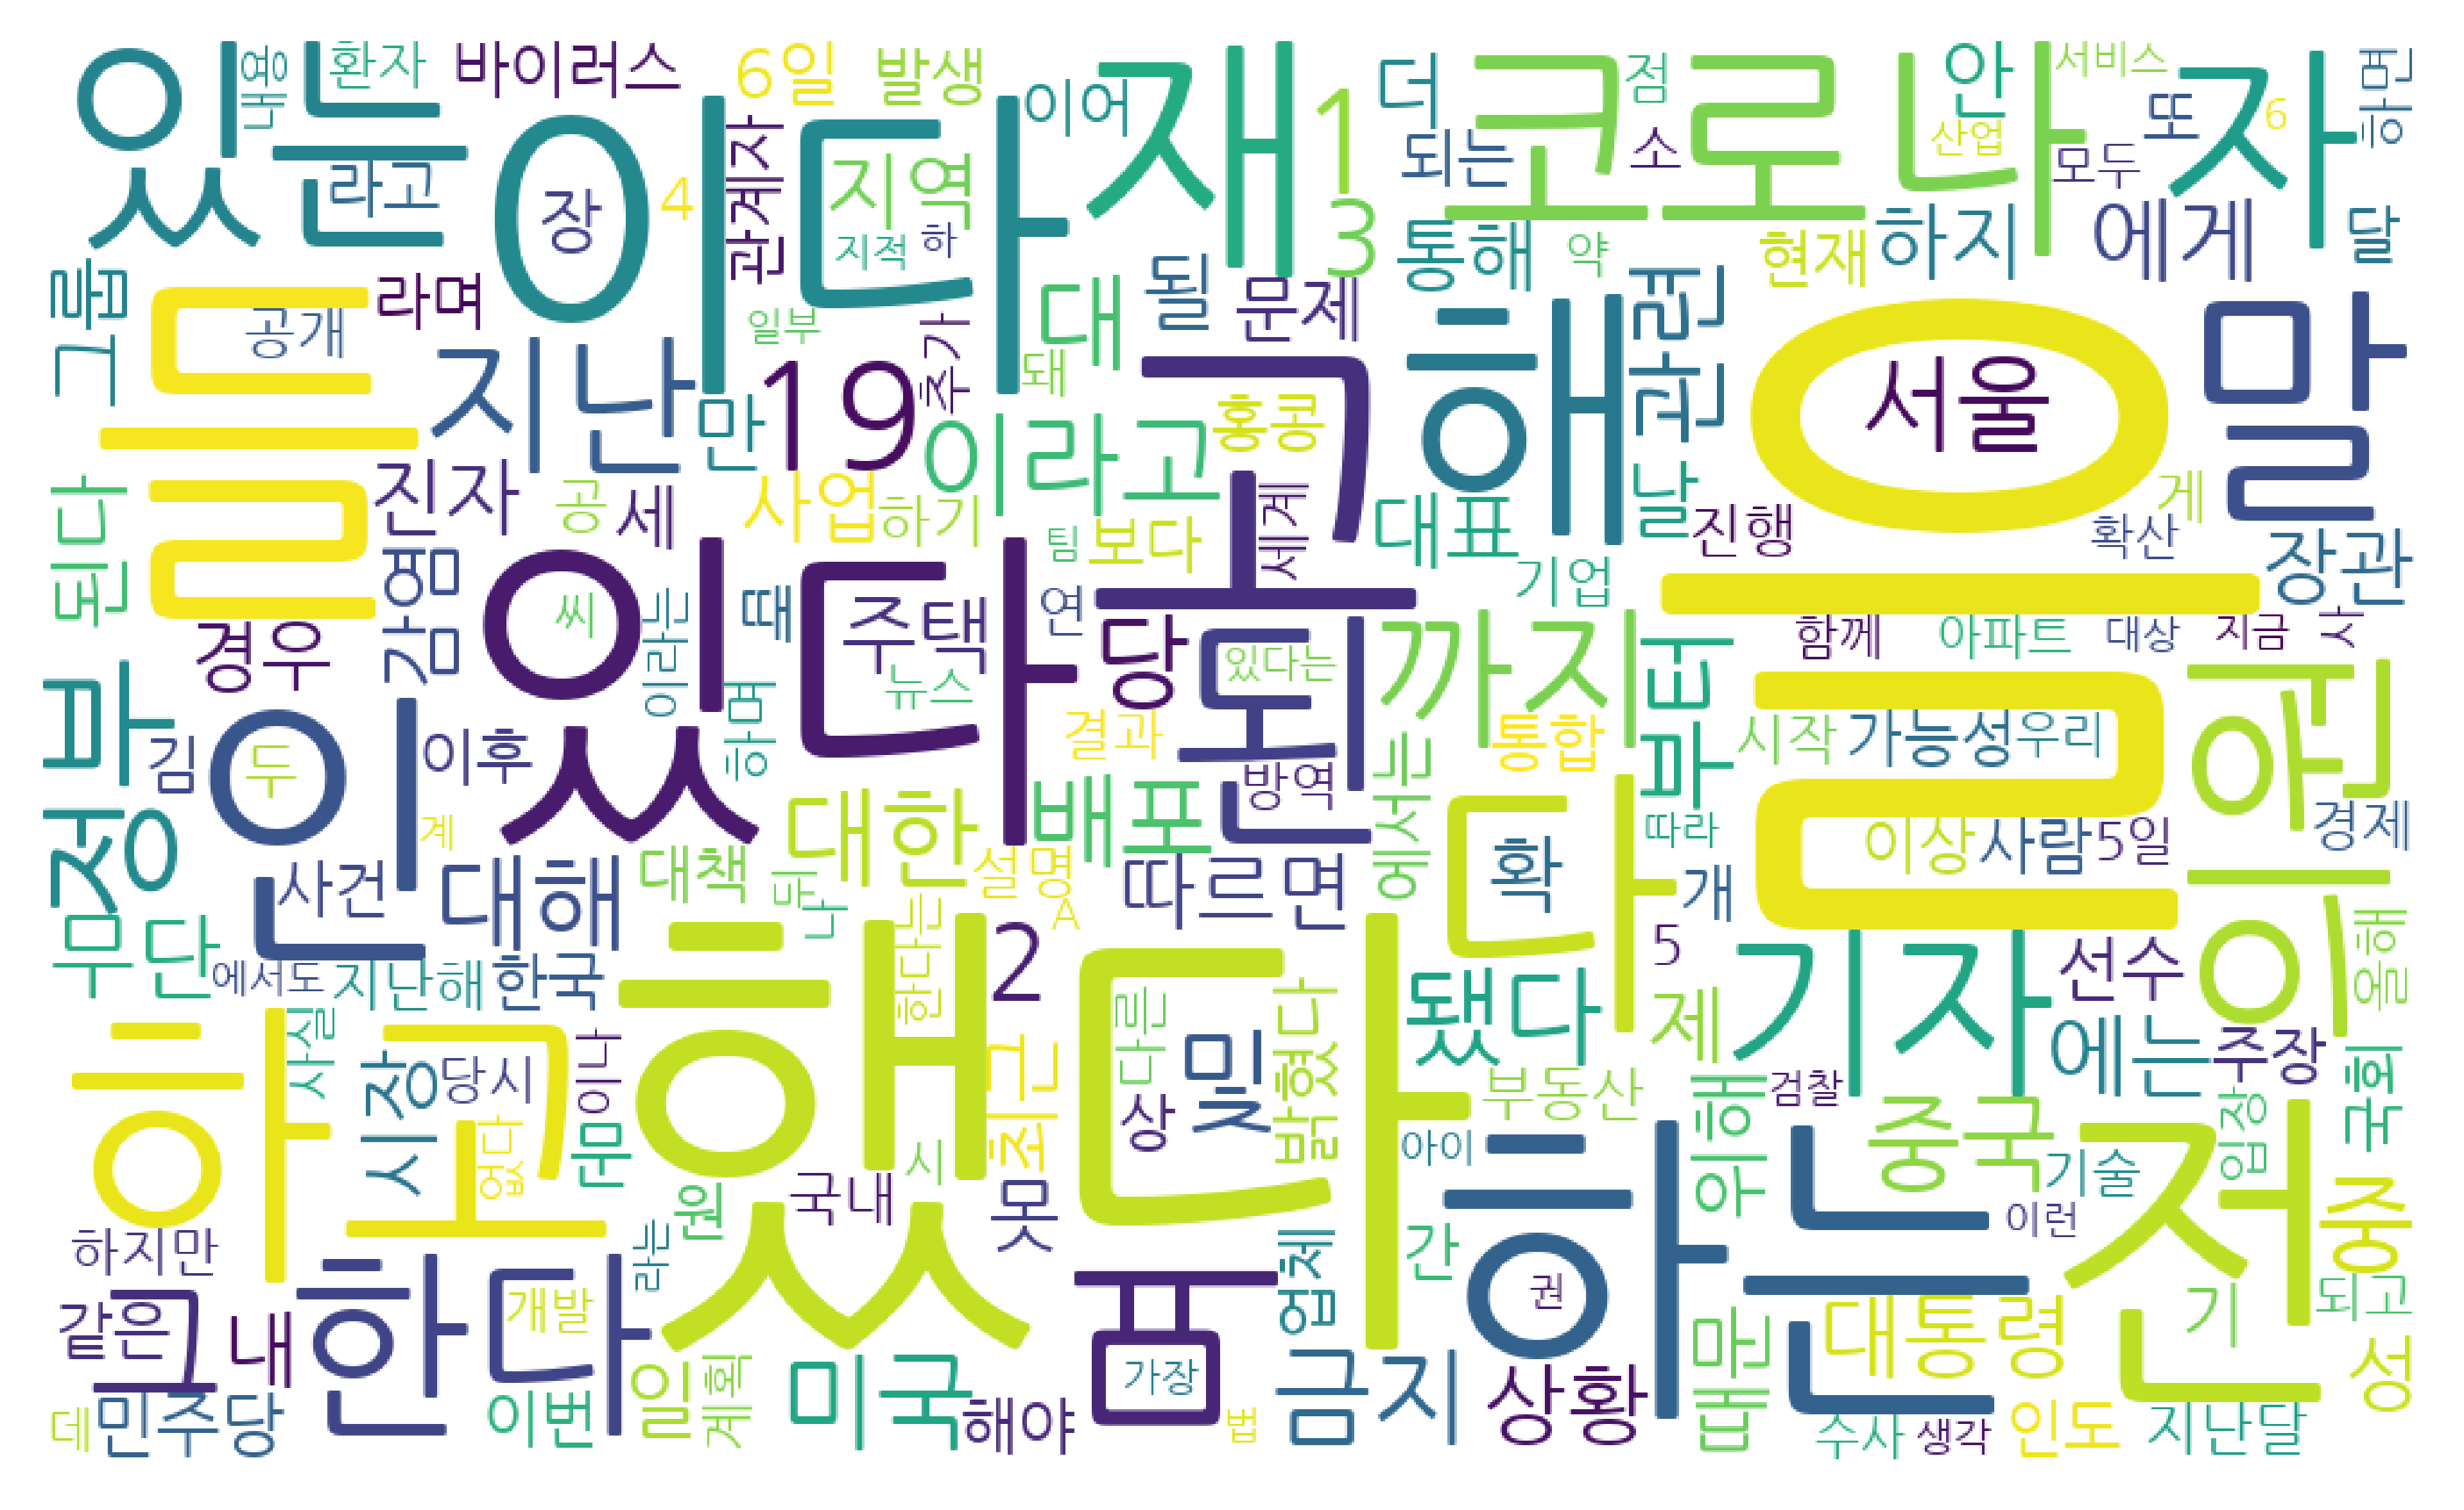

In [15]:
from wordcloud import WordCloud
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(width=1000, height=600, background_color="white", random_state=0,
              font_path=font_path)
plt.imshow(wc.generate_from_frequencies(fd))
plt.axis("off")
plt.show()

In [16]:
docs = tuple([x for x in df_sum.to_numpy()])
docs[0]

'“휘어지면서 바람을 이겨내는 대나무보다는 바람에 부서지는 참나무로 살겠다.”     추미애 법무부 장관이 페이스북 자기 소개란에 적어 놓은 문구다. 강직함을 표상으로 삼고 싶어서였던지 추 장관은 1995년 김대중 전 대통령 권유로 정계에 입문한 이후 25년간 줄곧 강골 여성 정치인의 길을 걸어왔다. 정치적 갈등 국면에선 우회로가 아닌 전투를 택했고, 옳다고 믿는 일을 추진하는 데 거리낌이 없었다. 그에게 ‘추다르크’라는 별명이 생긴 이유다. 추 장관의 한 측근은 “여성 정치인 중 드물게 전투에 최적화된 스타일”이라며 “특히 자신의 권위나 권한이 위협받는 상황에서 예민하게 반응한다”고 말했다.        추 장관의 이같은 면모는 최근 윤석열 검찰총장과의 갈등 국면에서 더욱 두드러진다. 지난 1월 취임 이후 6개월째 윤 총장과 기싸움을 벌여온 추 장관의 태도는 줄곧 강경 일변도였다. 취임 직후 사실상 ‘윤석열 사단’ 좌천성 인사를 단행해 그의 손발을 잘라냈다는 평가를 받았고, 비판 발언의 수위도 점차 높아져 왔다. 지난달 25일엔 “이런 말 안 듣는 총장과 일해 본 장관이 없다”며 불편한 감정을 노골적으로 드러냈다.             추 장관과 윤 총장 간 갈등은 민주당이 추구하는 ‘검찰 개혁’ 이슈와 맞물려 여의도 정치권으로 옮겨붙은 뒤 확전 양상이다. “조직을 위해 (윤 총장이) 결단해야 한다”(국회 법사위원장인 윤호중 민주당 의원)는 여당은 직간접적으로 윤 총장의 사퇴를 압박하고, 야당은 ‘추미애 장관 탄핵’을 언급하며 맞불을 놓고 있다. 여야가 각각 추 장관과 윤 총장을 대리해 공방을 벌이고 있는 형국이다.           그런데 최근 민주당 내에서 다소 이상기류가 감지되고 있다. 추 장관의 공세적 행보를 향한 우려의 목소리가 일부 흘러나오기 시작했다. 특히 추 장관이 지난 3일 윤 총장에 대해 이른바 ‘검·언 유착 의혹 사건’에서 손을 떼라고 지휘권을 발동한 이후 민주당 내에선 자중론을 이야기하는 목소리가 조금씩 커지고 있다.           

In [17]:
def ntokenize(doc):
    tokens = [t for t in tagger.nouns(doc)]
    return tokens

In [18]:
from tqdm import tqdm

sentences = []
for d in tqdm(docs):
    tokens = [token for token in ntokenize(d) if token.isalnum()]
    sentences.append(tokens)
    words = [word for sentence in sentences for word in sentence]
    len(words)

100%|██████████| 358/358 [00:34<00:00, 10.27it/s]


In [76]:
len(words)

109759

In [83]:
words[:10]

['지면', '바람', '대나무', '바람', '참나무', '추미애', '법무부', '장관', '페이스북', '자기']

In [78]:
len(words)

87784

In [67]:
words_remove = ['것', '등', '고', '이', '수', '전', '재', '명', '며', '및', '그', '위',
               '중', '의', '를', '더', '날', '무단', '배포', '위해', '대표', '때문', '그룹',
               '통해', '최근', '경우', '안', '이번', '이후', '라며', '로', '때', '개', '또',
               '달', '일', '지난', '대해', '김', '제']
words_r = [word for word in words if word not in words_remove]
len(words_r)

95456

In [68]:
from nltk import FreqDist
fd = FreqDist(words_r)

In [69]:
fd.most_common(20)

[('말', 529),
 ('코로나', 463),
 ('의원', 429),
 ('기자', 402),
 ('정부', 360),
 ('대한', 326),
 ('미국', 303),
 ('금지', 294),
 ('서울', 282),
 ('중국', 280),
 ('관련', 277),
 ('대통령', 267),
 ('상황', 250),
 ('지역', 245),
 ('장관', 237),
 ('시장', 230),
 ('주택', 226),
 ('확', 225),
 ('진자', 219),
 ('감염', 215),
 ('사업', 202),
 ('민주당', 199),
 ('문제', 192),
 ('선수', 192),
 ('바이러스', 192),
 ('발생', 190),
 ('국회', 189),
 ('한국', 181),
 ('홍콩', 180),
 ('사람', 176),
 ('이상', 175),
 ('인도', 175),
 ('현재', 172),
 ('대책', 172),
 ('관계자', 171),
 ('사건', 170),
 ('업체', 157),
 ('통합', 155),
 ('주장', 155),
 ('가능성', 154)]

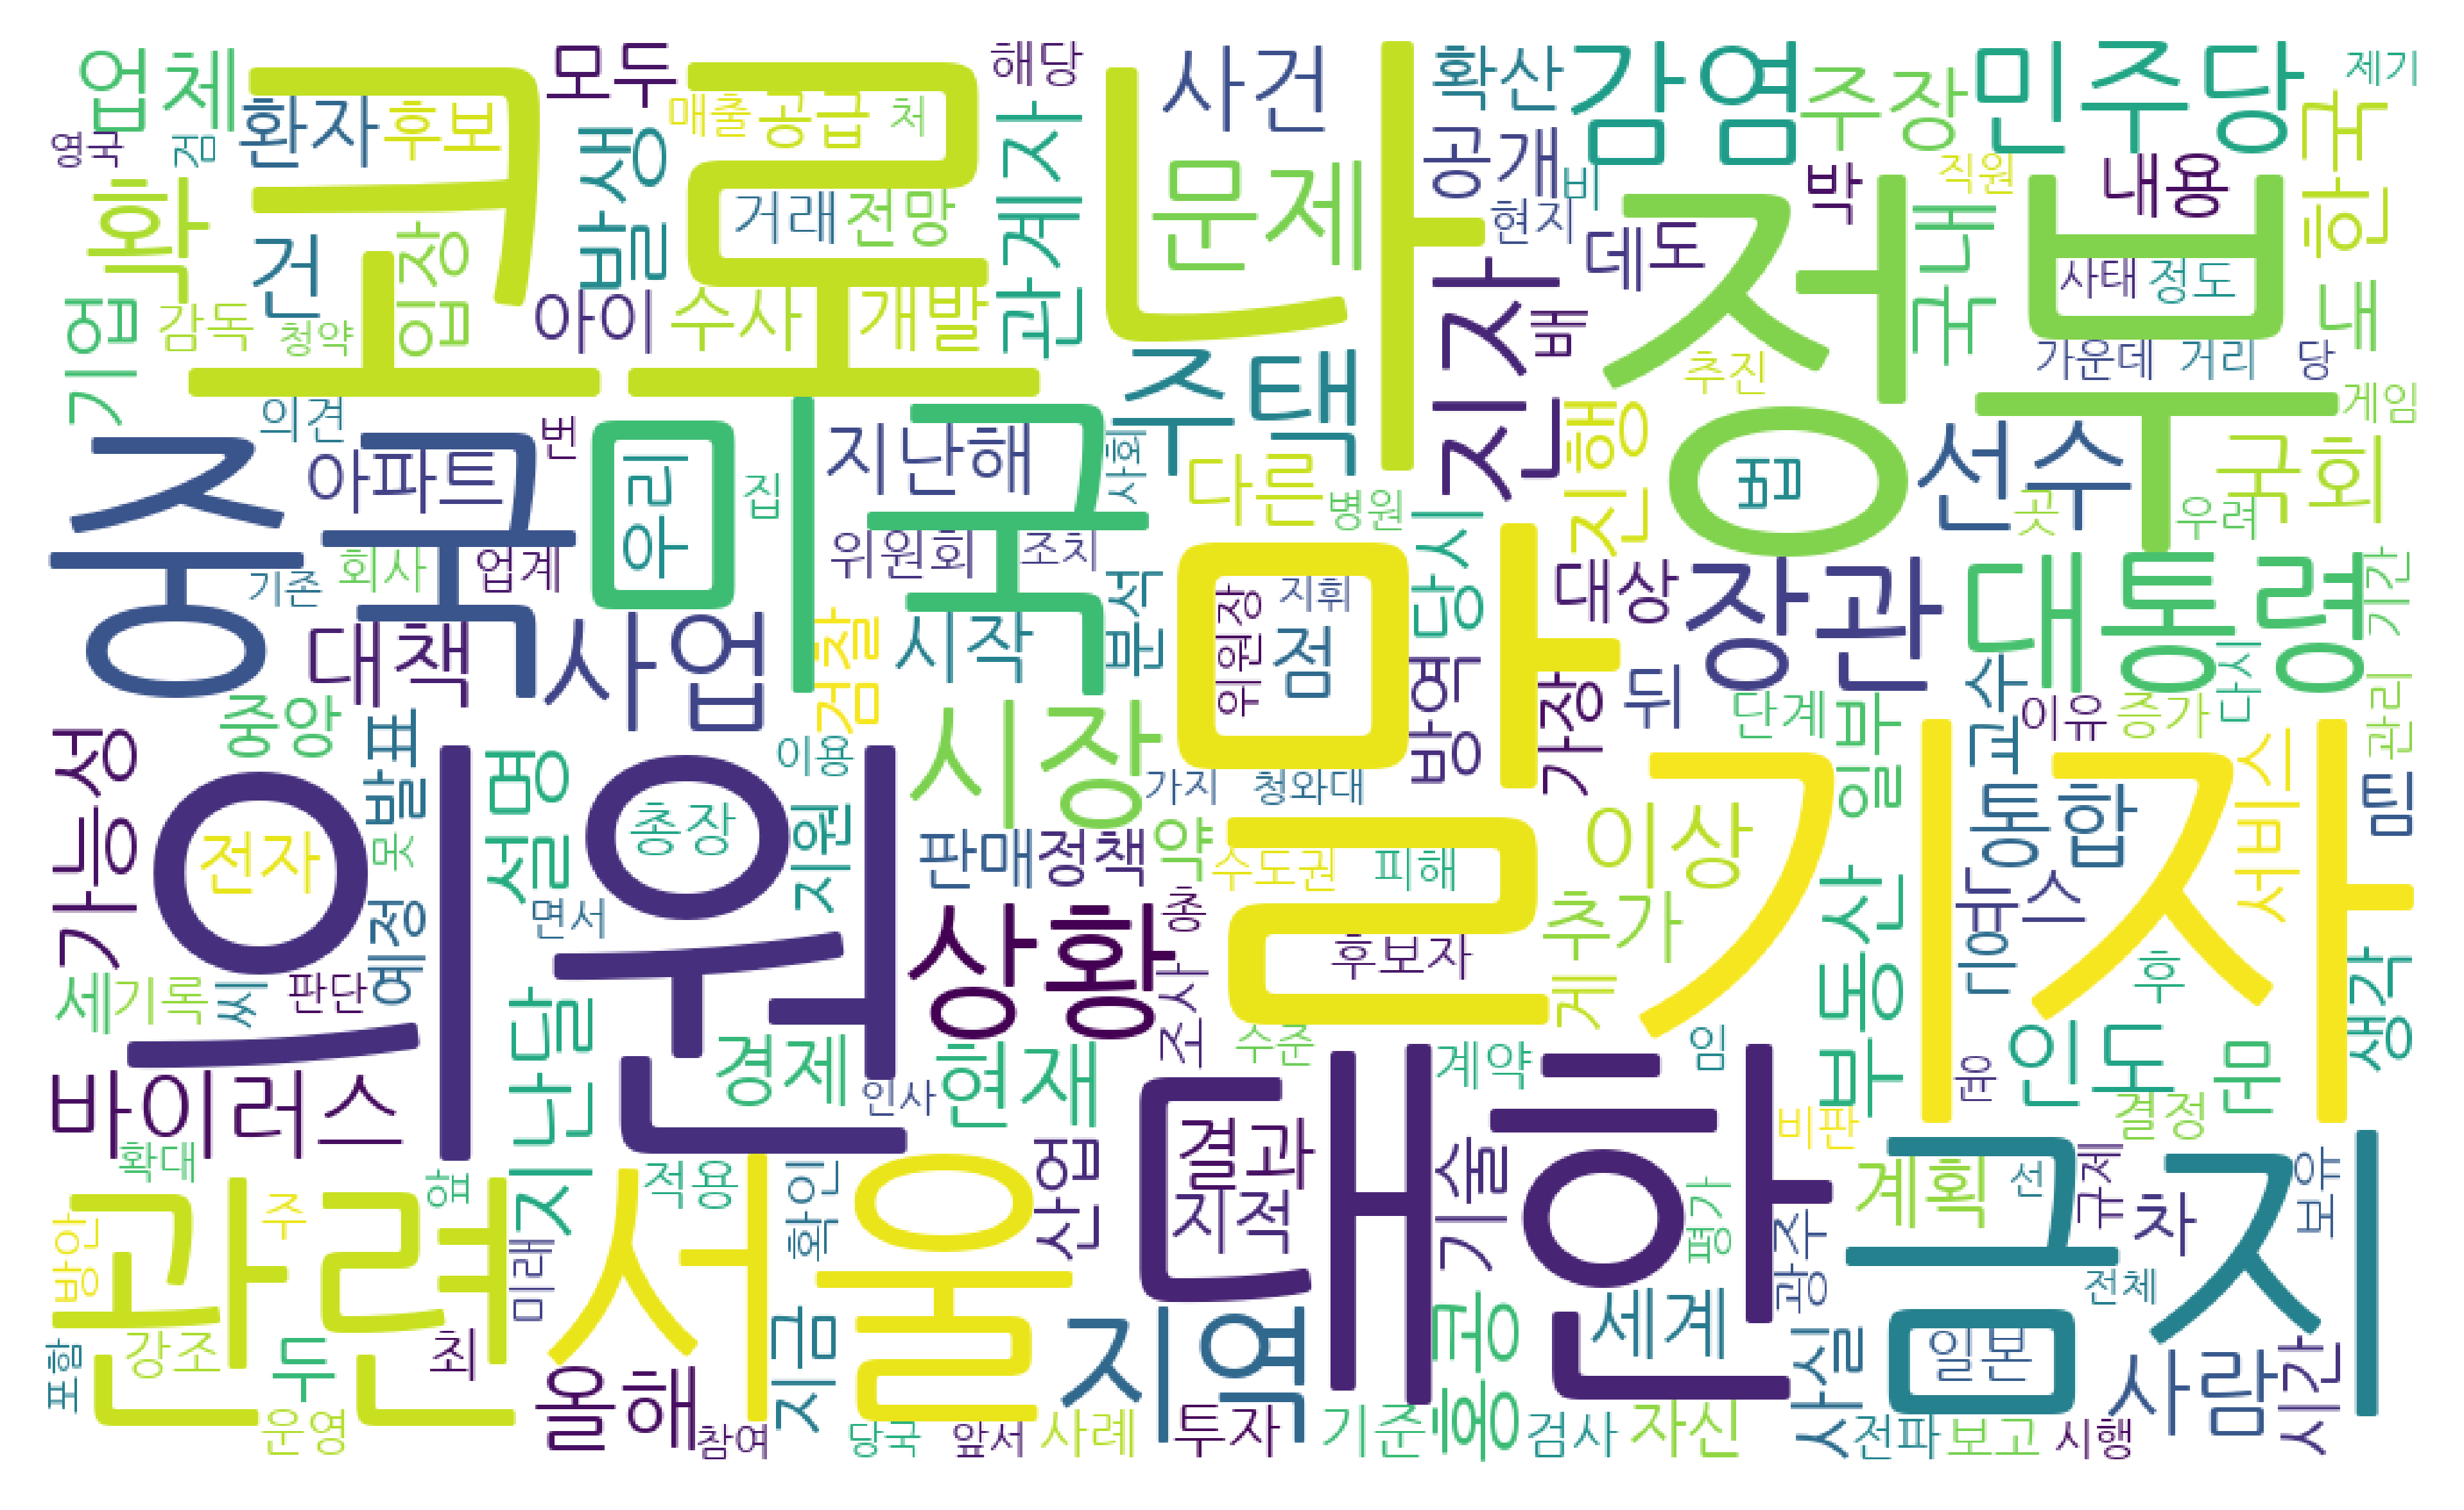

In [85]:
from wordcloud import WordCloud
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(width=1000, height=600, background_color="white", random_state=0,
              font_path=font_path)
plt.imshow(wc.generate_from_frequencies(fd))
plt.axis("off")
plt.savefig('wordcloud_{}.png'.format())
plt.show()

In [89]:
from datetime import datetime

In [93]:
print(datetime.now().strftime("%d.%m.%Y_%H:%M:%S"))

07.07.2020_00:19:08


In [100]:
str = "wordcloud_" + datetime.now().strftime("%d.%m.%Y_%H.%M.%S") + ".png"
str

'wordcloud_07.07.2020_00.21.04.png'

In [101]:
plt.savefig(str)

<Figure size 2400x2400 with 0 Axes>

In [9]:
from konlpy.tag import Okt
from tqdm import tqdm
from nltk import FreqDist
from wordcloud import WordCloud
from datetime import datetime

def tokenize(doc):
    tagger = Okt()
    tokens = [t for t in tagger.nouns(doc)]
    return tokens

def towordcloud(df):
    df = df.dropna()
    docs = tuple([x for x in df.to_numpy()])
    sentences = []
    for d in tqdm(docs):
        tokens = [token for token in tokenize(d) if token.isalnum()]
        sentences.append(tokens)
    words = [word for sentence in sentences for word in sentence]
    words = [word for word in words if len(word) > 1]
    words_remove = ['으로', '에서', '에도', '했다', '있다', '이다', '무단', '배포', '위해', '대표', '때문', 
                    '그룹', '통해', '최근', '경우', '이번', '이후', '라며', '지난', '대해', '기자', '관련',
                   ]
    words_r = [word for word in words if word not in words_remove]
    fd = FreqDist(words_r)
#     print(fd.most_common(20))
    font_path = r'C:\Users\Gk\Documents\dev\Crawling\koverwatch.ttf'
    wc = WordCloud(width=1000, height=600, background_color="white", random_state=0,
                  font_path=font_path)
    plt.imshow(wc.generate_from_frequencies(fd))
    plt.axis("off")
    str = "wordcloud_" + datetime.now().strftime("%d.%m.%Y_%H.%M.%S") + ".png"
    plt.savefig(str)
    plt.show()

100%|██████████| 359/359 [00:46<00:00,  7.73it/s]


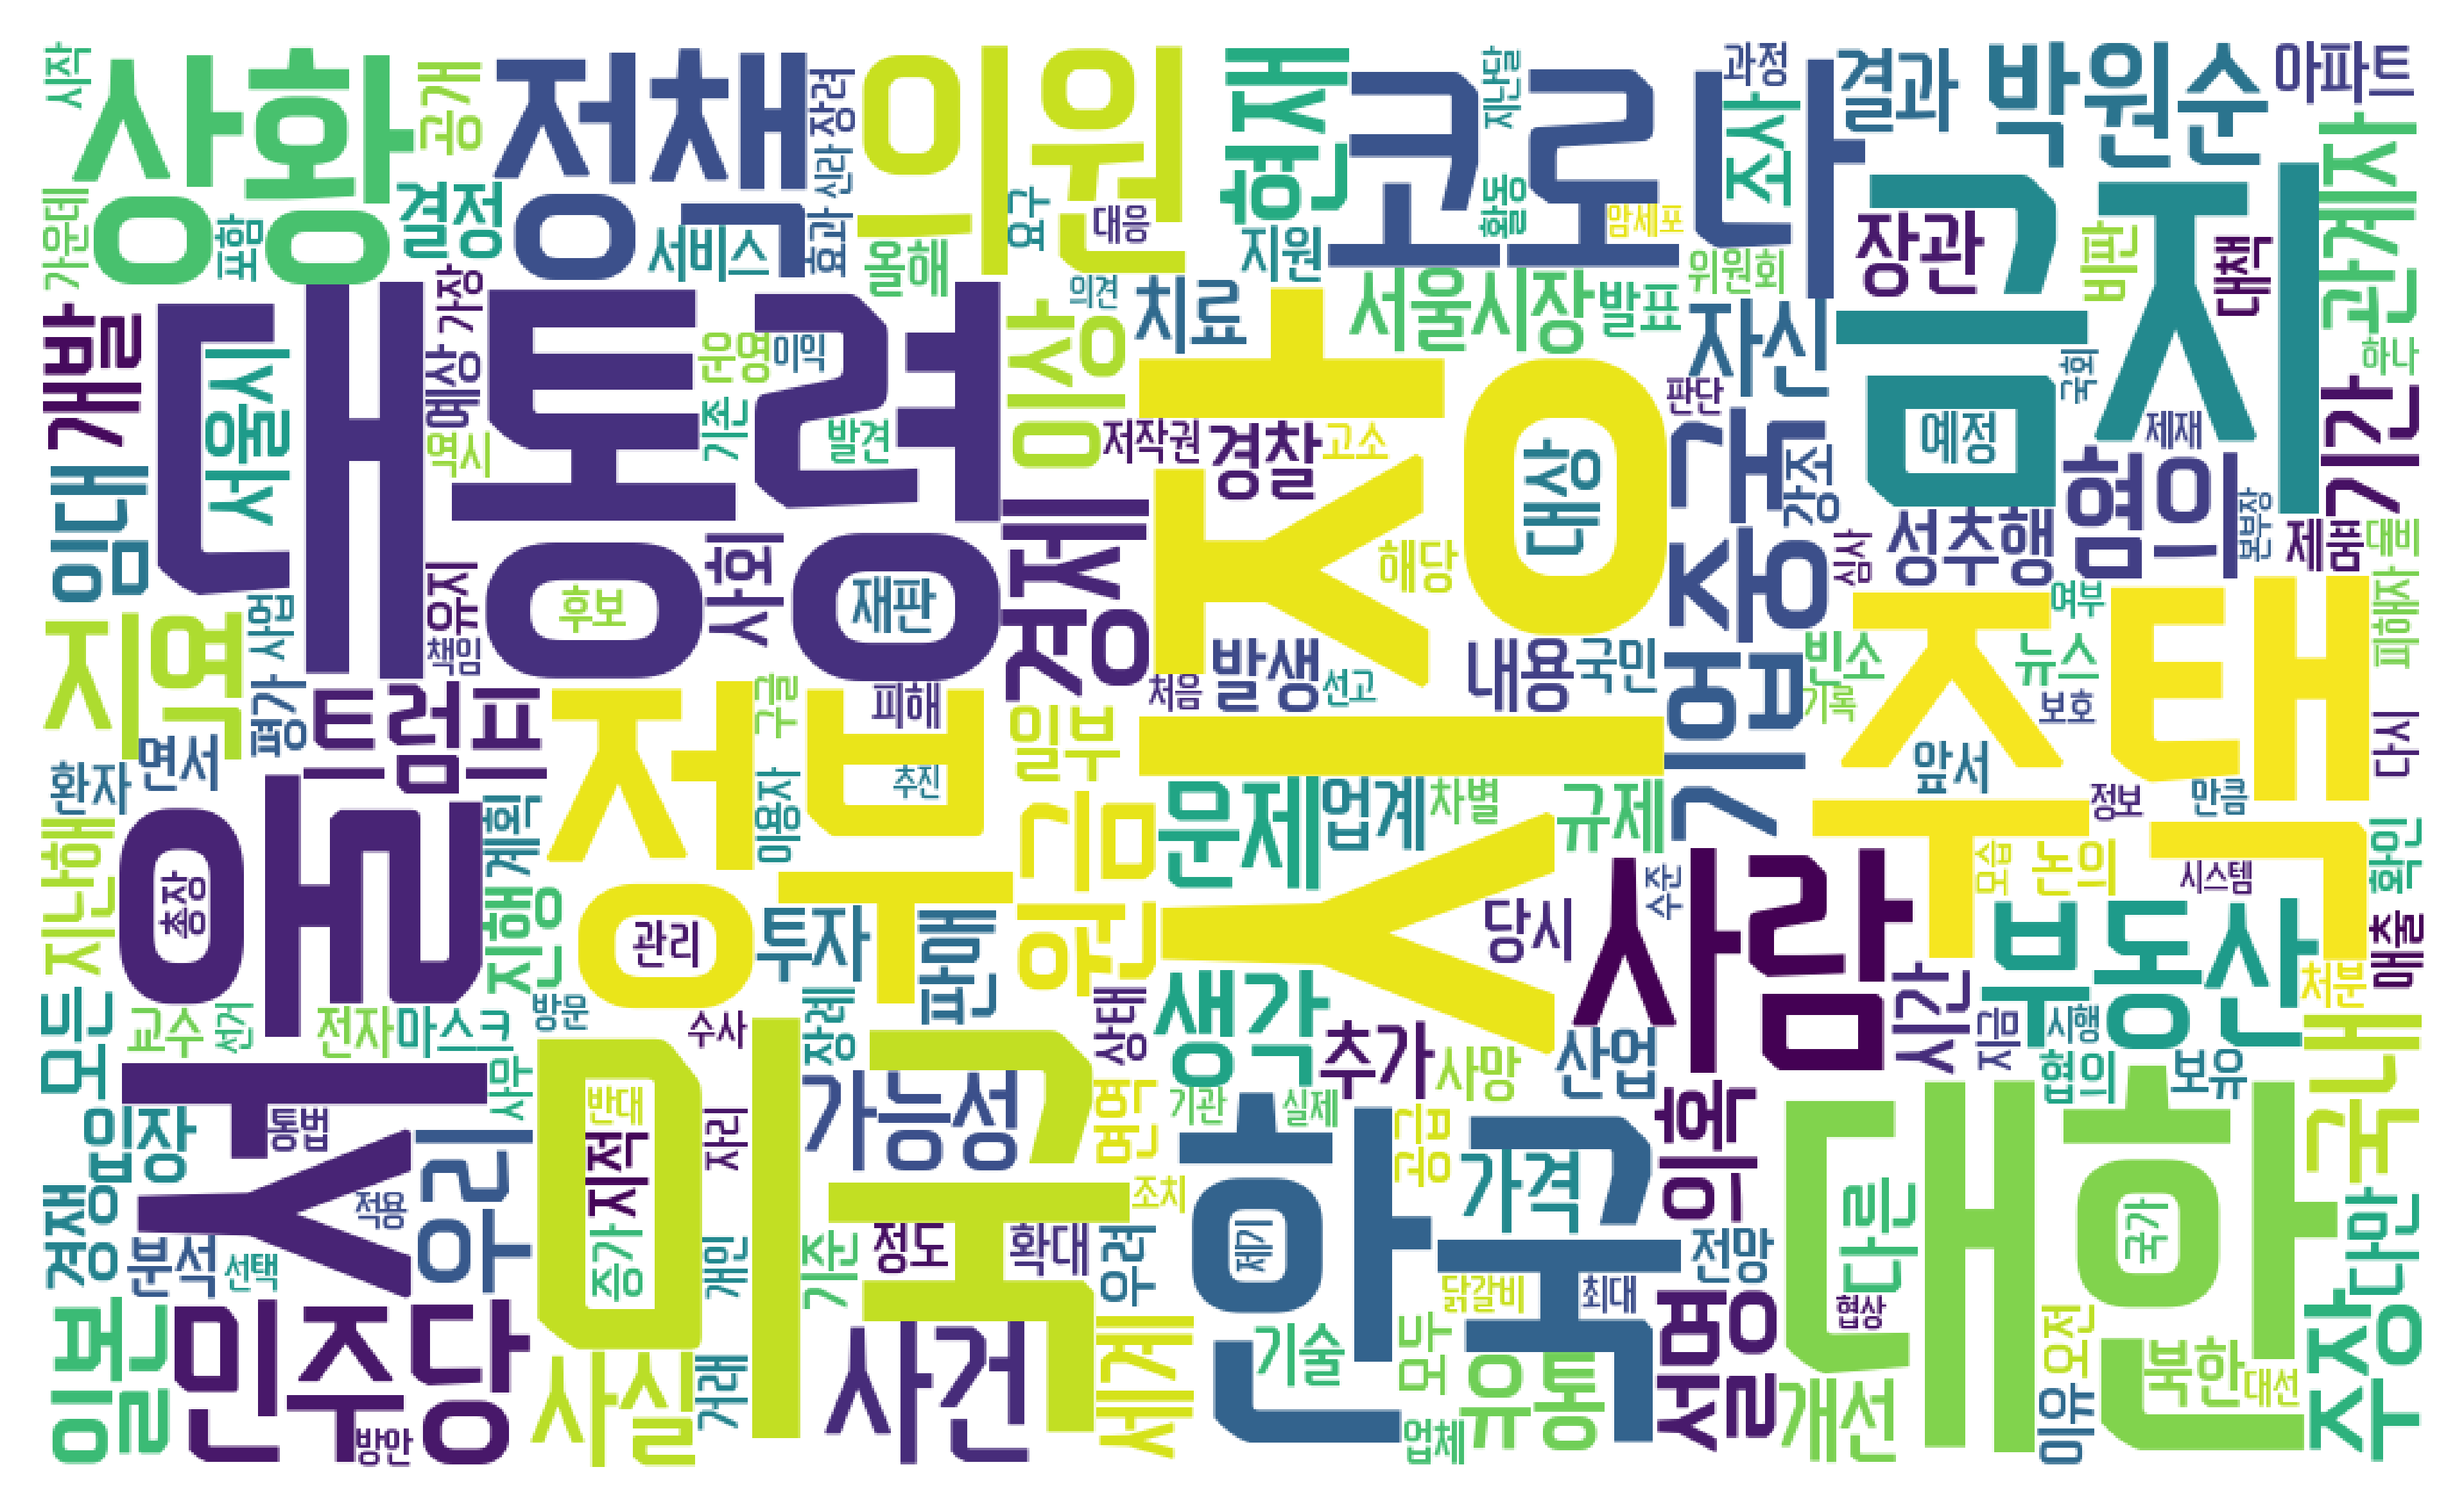

In [10]:
towordcloud(df_n['content'])

# Pipeline 설정

In [65]:
import pymongo
client = pymongo.MongoClient("mongodb://")
db = client.naver
collection = db.article

collection.insert({"title": "data1"})

C:\Users\Gk\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  


ObjectId('5f0ad0ea05e2f1d2f6bf1479')

In [1]:
%%writefile newsNaver/newsNaver/mongodb.py
import pymongo

client = pymongo.MongoClient("")
db = client.naver
collection = db.article

Overwriting newsNaver/newsNaver/mongodb.py


In [3]:
%%writefile newsNaver/newsNaver/pipelines.py
from itemadapter import ItemAdapter
from .mongodb import collection

class NewsnaverPipeline:
    
    def process_item(self, item, spider):
        
        data = {
            "title": item["title"],
            "category": item["category"],
            "content": item["content"],
            "link": item["link"],
        }
        collection.insert(data)
        
        return item


Overwriting newsNaver/newsNaver/pipelines.py


# [추가] Setting.py 변경완료